In [1]:
from keras.layers import Dense
from keras.models import Sequential
from bitstring import BitArray
import numpy as np

Using TensorFlow backend.


In [2]:
from sklearn.datasets import load_boston

In [3]:
boston_data = load_boston()

In [4]:
data = boston_data["data"]
target = boston_data["target"]
data.shape , target.shape

((506, 13), (506,))

In [5]:
model = Sequential()
model.add(Dense(20, input_dim=13, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1))

In [6]:
model.compile("adamax" , "mse")

In [7]:
# model.fit( data , target , epochs=1  )

In [8]:
layers_shape = [ lw.shape for lw in model.get_weights()]
layers_shape

[(13, 20), (20,), (20, 10), (10,), (10, 1), (1,)]

In [9]:
polulation=[  ]
for i in range( 30 ):
    temp_chromo=[]
    for j in range( len(layers_shape) ):
        if len(layers_shape[j])==2:
            temp_chromo.append(   np.random.randn( layers_shape[j][0] , layers_shape[j][1]  )   )
        elif len(layers_shape[j])==1:
            temp_chromo.append(   np.random.randn( layers_shape[j][0]  )   )
    
    polulation.append( temp_chromo )

In [10]:
# polulation[0][0]

In [11]:
def Float2Bin(polulation):
    polulation_bin=[]
    for float_chromosome in polulation:
        
        bin_chromosome = ""
        for lw in float_chromosome:
            bin_chromosome+="".join(  [ np.binary_repr( wij ,width=32 ) for wij in  np.array( lw.flatten()*10**8 , dtype=np.int32)   ] )
        
        polulation_bin.append( bin_chromosome )
        
    return polulation_bin


def Bin2Float( bin_chromosome , all_layers_shape ):
    
    float_chromosome=[]
    comsumed_bits = 0
    for i in range( len(all_layers_shape) ):  # this will iterate over the number of layers

        total_bits = np.prod( all_layers_shape[i] )*32    # total bits in layer i

        #print( all_layers_shape[i] ,comsumed_bits , comsumed_bits+ total_bits )    

        layer_i_variables=[]
        for j in range(0 , total_bits , 32  ):
            int_varibale = BitArray( bin= bin_chromosome[ comsumed_bits:(total_bits+comsumed_bits)][j:j+32] ).int/(10**8)
            layer_i_variables.append( int_varibale )

        comsumed_bits +=total_bits
        float_chromosome.append(  np.reshape( layer_i_variables , all_layers_shape[i] )  )
            
        
    
    return float_chromosome

# def Bin2Float( bin_polulation , all_layers_shape ):
#     float_polulation=[]
#     for bin_chromosome in bin_polulation:
        
#         float_chromosome=[]
#         comsumed_bits = 0
#         for i in range( len(all_layers_shape) ):  # this will iterate over the number of layers
            
#             total_bits = np.prod( all_layers_shape[i] )*32    # total bits in layer i
             
#             #print( all_layers_shape[i] ,comsumed_bits , comsumed_bits+ total_bits )    
                
#             layer_i_variables=[]
#             for j in range(0 , total_bits , 32  ):
#                 int_varibale = BitArray( bin= bin_chromosome[ comsumed_bits:(total_bits+comsumed_bits)][j:j+32] ).int/(10**8)
#                 layer_i_variables.append( int_varibale )
            
#             comsumed_bits +=total_bits
#             float_chromosome.append(  np.reshape( layer_i_variables , all_layers_shape[i] )  )
            
#         float_polulation.append( float_chromosome )
    
#     return float_polulation

In [12]:
bin_polulation   = Float2Bin( polulation )

In [13]:
def MutAndCros(  selected_pop , cxpb=0.5, mutpb=0.5  ):
    shuffled_indexs = np.arange( len(selected_pop) )
    np.random.shuffle( shuffled_indexs )
    
    chromosome_size = len(selected_pop[0])
    center= chromosome_size//2
    
    cross_overed_pop = []
    for i in range( 0, len(shuffled_indexs) , 2 ):
        parent1= shuffled_indexs[i]
        parent2= shuffled_indexs[i+1]
        if ( parent1 < len(selected_pop) ) and ( parent2 < len(selected_pop) ):
            cross_overed_pop.append( selected_pop[parent1][:center]+ selected_pop[parent2][center:] )
            cross_overed_pop.append( selected_pop[parent2][:center]+ selected_pop[parent1][center:] )
            
    mutated_pop=[]        
    mutation_indexs = np.random.randint(0, chromosome_size, size=len(selected_pop) )
    for i in range( len(selected_pop) ):
        if selected_pop[i][ mutation_indexs[i]  ]=="0":
            mutated_pop.append( selected_pop[i][ :mutation_indexs[i]  ]+"1"+selected_pop[i][ mutation_indexs[i]+1:  ]  )
        else:
            mutated_pop.append( selected_pop[i][ :mutation_indexs[i]  ]+"0"+selected_pop[i][ mutation_indexs[i]+1:  ]  )
            
    return mutated_pop+cross_overed_pop+selected_pop


def select_polulation(pop, fitness_score, num_parents):
    # Selecting the best individuals in the current generation as parents for producing the offspring of the next generation.
    
    return_pop = []
    for indx in np.argsort( fitness_score )[:num_parents]:
        return_pop.append( pop[indx] ) 
    return return_pop

In [18]:
 

#selection , corssover ,  mutate
loss=[]
while True:
    fitness_score = []
    for chromosome in bin_polulation:
        weights = Bin2Float( chromosome , layers_shape )
        model.set_weights( weights )
        fitness_score.append(   np.mean( (np.array( model.predict( data )) - target[:,np.newaxis])**2  )     )
    
    print( min(fitness_score)  )
    loss.append(  min(fitness_score)  )
    selected_pop = select_polulation( bin_polulation , fitness_score , 10 )
    bin_polulation = MutAndCros( selected_pop  )
    

2477.35775803151
2475.9674485128025
2475.6963089241826
2475.6963089241826
2475.6959838035705
2475.6959838035705
2470.777019685383
2470.777019685383
2470.6957520161104
2469.8770849961397
2464.3341359382116
2455.2799470727923
2455.2799470727923
2455.1505739609415
2452.649831326353
2452.649831326353
2448.5818279089035
2448.1866780092337
2448.1866780092337
2448.1866748815423
2447.9326826488864
2447.932679521195
2447.932679521195
2447.877190397448
2447.876623913184
2436.880917858494
2436.880917858494
2436.880917858494
2436.880917858494
2436.8808519020013
2398.6998975669962
2398.6998975669962
2398.6998975669962
2398.6952888996793
2398.6952888996793
2391.318710941837
2391.318146521035
2391.318146521035
2391.307554677677
2391.307554677677
2391.307554677677
2386.2784043736283
2386.2784043736283
2386.2784043736283
2386.2780218675866
2386.2780218675866
2386.2780218675866
2384.1316122252992
2383.2535235554733
2382.1075628002877
2372.545856163408
2356.714701640278
2356.714701640278
2356.71470164027

1164.7483479081268
1164.7481852628941
1164.7481852628941
1164.4594928395798
1164.4593811887694
1164.0966997706757
1164.0966997706757
1164.0966997706757
1164.09513089214
1159.7513978246018
1159.7437318257168
1158.3529423923105
1158.3529423923105
1158.3527906639686
1142.2885906359204
1142.2885906359204
1142.288504456361
1142.2645149458513
1140.9458006055015
1140.8933712481796
1140.8933712481796
1140.8933712481796
1140.8928747109182
1140.8928747109182
1138.9296779069075
1138.9296779069075
1138.4330533349237
1138.4330533349237
1137.1860689063262
1137.1860689063262
1137.045633795576
1136.985550854192
1136.985550854192
1136.985550854192
1136.8465693052997
1136.8465693052997
1136.8465693052997
1132.1666845890466
1132.1666845890466
1132.1663050651805
1132.1663050651805
1127.9185967918156
1124.1501719107316
1119.902209009475
1119.902209009475
1119.9022064349867
1119.7534829650672
1119.7534829650672
1119.6910631944713
1117.1061521762454
1115.9824790113826
1115.9824766944544
1115.9823876022438
11

KeyboardInterrupt: 

In [ ]:
import matplotlib.pyplot as plt

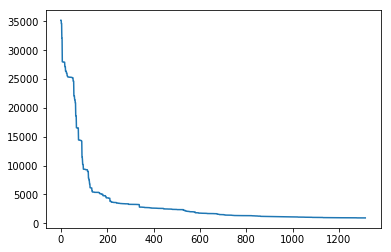

In [19]:
plt.plot( loss )

In [49]:
error=0
for ch in range( len( polulation)   ):
    for l in range( len(polulation[ch]) ):
        error+=np.sum( polulation[ch][l] - float_polulation[ch][l] )

In [50]:
error

-3.978447524685138e-08